# PCA

Lets do a simple PCA to understando what it is


In [122]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris_ds = load_iris()

X = pd.DataFrame(iris_ds.data,columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
y = pd.Series(iris_ds.target_names[iris_ds.target],name='class')

X.dropna(how="all", inplace=True)
y.dropna(how="all", inplace=True)
df = X.copy()
df['class'] = y
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


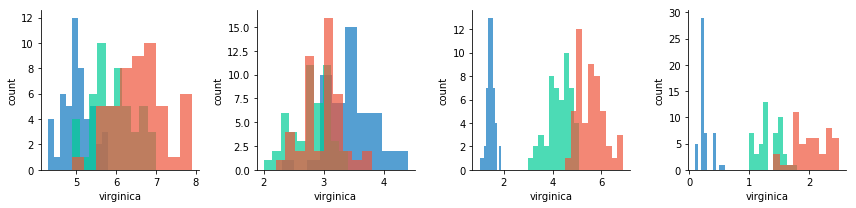

In [142]:
fig, axs = plt.subplots(figsize=(12,3),ncols=4)

colors = {'setosa':     '#0D76BF', 
          'versicolor': '#00cc96', 
          'virginica':  '#EF553B'}

legend = {0:False, 1:False, 2:False, 3:True}

for (f,ax) in zip(x.columns,axs):
    for c in iris_ds.target_names:
        ax.hist(X[f][y==c],color=colors[c],alpha=0.7)
        for s in ('right', 'top'):
            ax.spines[s].set_visible(False)
        ax.set_xlabel(c)
        ax.set_ylabel('count')
fig.tight_layout()

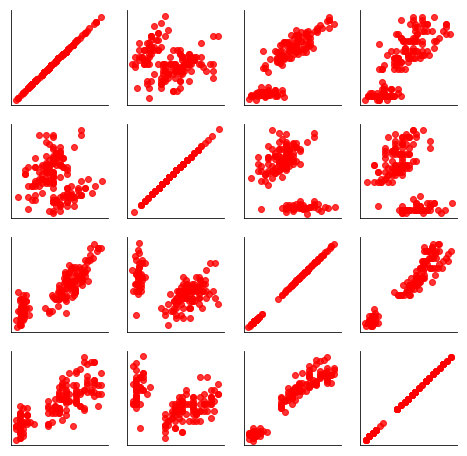

In [124]:
fig,axs = plt.subplots(figsize=(8,8),ncols=4,nrows=4)
fs = [(f1,f2) for f1 in X.columns for f2 in X.columns]
for ax,(f1,f2) in zip(axs.ravel(),fs):
    for s in ('top', 'right'):
        ax.spines[s].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for c in iris_ds.target_names:
        ax.scatter(X[f1][y==c],X[f2][y==c],alpha=0.8,color='r')#colors[c])

In [125]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [126]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s\n\n' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


NumPy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [127]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [128]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [129]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [130]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [131]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [132]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9184978165319952
0.9140304714680697
0.14675687557131495
0.020714836428618932


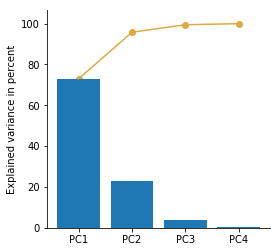

In [133]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

fig, ax = plt.subplots(figsize=(4,4))

ax.bar(np.arange(4),var_exp)
ax.plot(np.arange(4),cum_var_exp,color='#ddaa44')
ax.scatter(np.arange(4),cum_var_exp,color='#ddaa44')
_=[ax.spines[s].set_visible(False) for s in ('top', 'right')]
ax.set_xticklabels(' ,PC1,PC2,PC3,PC4'.split(','))
_=ax.set_ylabel('Explained variance in percent')

In [134]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [135]:
z1,z2 = X_std.dot(matrix_w).T

Text(0, 0.5, 'PCA component 2')

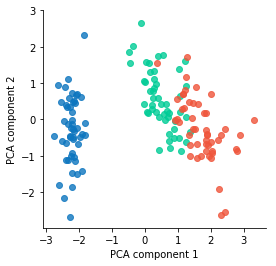

In [144]:
fig,ax = plt.subplots(figsize=(4,4))
for c in iris_ds.target_names:
    ax.scatter(z1[y==c],z2[y==c],alpha=0.8,color=colors[c])
for s in ('right', 'top'):
    ax.spines[s].set_visible(False)
    
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')

In [138]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

/opt/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


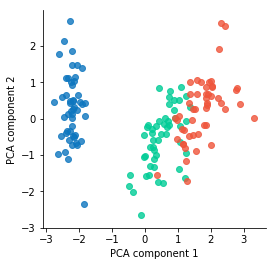

In [145]:
z1_skl,z2_skl = Y_sklearn.T

fig,ax = plt.subplots(figsize=(4,4))
for c in iris_ds.target_names:
    ax.scatter(z1_skl[y==c],z2_skl[y==c],alpha=0.8,color=colors[c])
for s in ('right', 'top'):
    ax.spines[s].set_visible(False)
    
ax.set_xlabel('PCA component 1')
_=ax.set_ylabel('PCA component 2')